# # Enunciado
Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a 
relação entre os dados de colesterol e peso com a incidência de problemas que 
influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos 
seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e 
tratamento para esses tipos de causa, a operadora quer realizar um estudo para 
identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar 
medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com 
a equipe de arquiteto de big data para 1juda-los a encontrar o grupo de risco dentre 
essas pessoas. Através da análise dos dados, os analistas da operadora de seguro de 
saúde identificaram 4 grandes grupos:

1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [ ]:
estados = pd.read_csv('estados_brasileiros.csv', sep= ';', encoding= 'latin-1')
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
idade = pd.read_csv('idade_clientes.csv', sep= ';', encoding= 'latin-1')
idade

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44
...,...,...
542,543,20
543,544,66
544,545,36
545,546,57


In [ ]:
clientes.info() # mostra informações da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe() # exibe a descrição da tabela especificada

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info() # mostra informações da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
estados.describe() # exibe a descrição da tabela especificada

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
idade.info() # mostra informações da tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe() # exibe a descrição da tabela especificada

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [ ]:
# Qual a média do colesterol dos clientes? 

clientes['colesterol'].mean()

170.43327239488116

In [ ]:
clientes.isna().sum() # conta quantos valores ausentes tem em uma tabela especifica

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
estados.isna().sum() # conta quantos valores ausentes tem em uma tabela especifica

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
idade.isna().sum() # conta quantos valores ausentes tem em uma tabela especifica

id_cliente    0
idade         0
dtype: int64

In [ ]:
clientes.loc[clientes['peso'].isnull()] # mostra as linhas da tabela com valores ausentes

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [ ]:
clientes.dropna(subset= ['peso'], inplace= True) # exclue valores ausentes

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
estados.dropna(subset= ['pais'], inplace= True)

In [ ]:
estados.count()

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

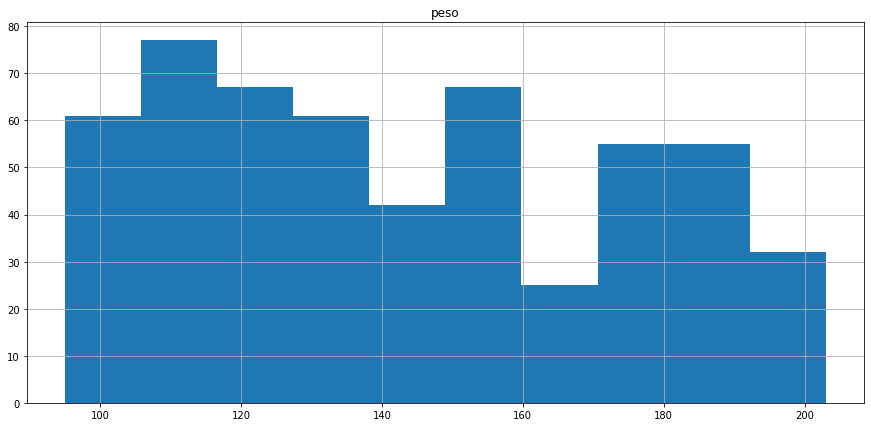

In [ ]:
clientes.hist(column='peso', figsize=(15,7)) # criando histograma
plt.show()

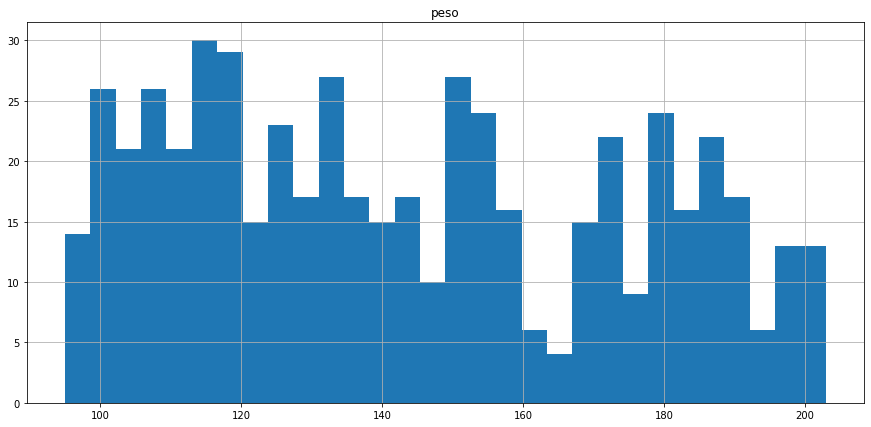

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=30) # criando histograma 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72b6b52e10>]],
      dtype=object)

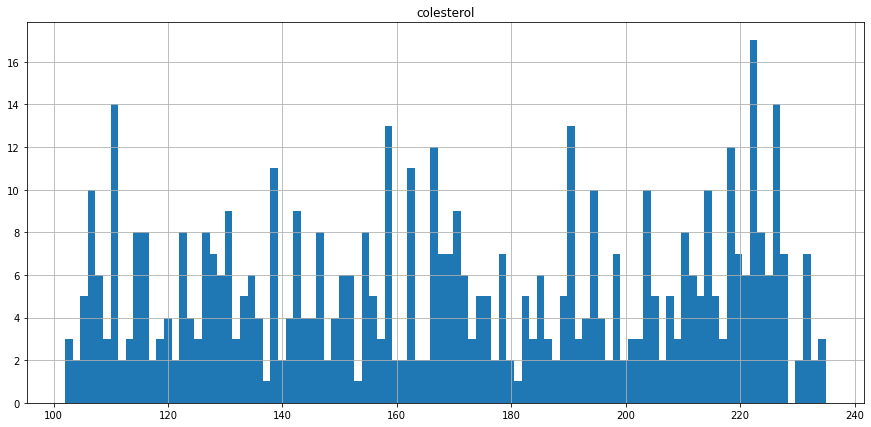

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clientes['genero_number']  = le.fit_transform(clientes['genero'])

In [ ]:
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f2ea01910>]],
      dtype=object)

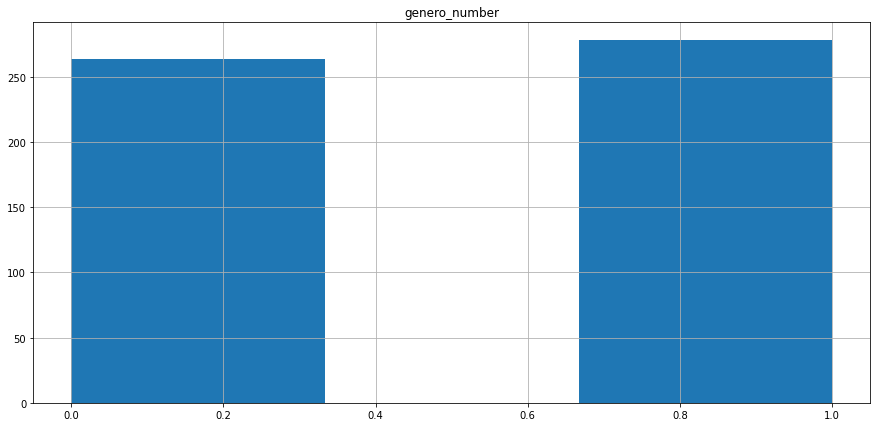

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=3)

In [ ]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


In [ ]:
clientes_estados = pd.merge(clientes,estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
base_completa = pd.merge(clientes_estados, idade, on= 'id_cliente').sort_values('id_cliente')


In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.rename(columns= {'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa [['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 
                                'sigla_estado', 'pais']].reset_index(drop=True)
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# machine learning

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def calculate_wcss(dados_cliente):
    wcss = []
    for k in range(1,11):
        kmeans = KMeans(n_clusters= k)
        kmeans.fit(X=dados_cliente)
        wcss.append(kmeans.inertia_)

    return wcss

In [ ]:
dados_cliente = base_completa [['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [ ]:
wcss_clientes = calculate_wcss(dados_cliente)

In [ ]:
type(wcss_clientes)

list

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'cluster {i} valor: {wcss_clientes[i]}')

cluster 0 valor: 1248240.6686746986
cluster 1 valor: 298932.7377352369
cluster 2 valor: 127847.61956819556
cluster 3 valor: 73814.61157727998
cluster 4 valor: 49003.21149973717
cluster 5 valor: 34064.50002100837
cluster 6 valor: 25105.881269412053
cluster 7 valor: 20385.04905714789
cluster 8 valor: 16003.657266380145
cluster 9 valor: 13396.893011946207


In [ ]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
grafico_wcss = px.line(x= range(1,11),
                       y= wcss_clientes
                       )

fig = go.Figure(grafico_wcss)
fig.update_layout(title= 'calculando wcss',
                  xaxis_title= 'numero de clusters',
                  yaxis_title= 'valor do wcss',
                  template= 'plotly_white')
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,baixo risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,baixo risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,baixo risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,risco morerado baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,risco alto
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,risco alto
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,risco morerado baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,baixo risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,risco morerado baixo


In [ ]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [ ]:
grafico = px.scatter(x= base_completa['peso'], 
                     y= base_completa['colesterol'], 
                     color= base_completa['cluster'])
grafico_centroide = px.scatter(x= centroides_cluster[:,0], y= centroides_cluster[:,1], size= [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# editando o grafico

In [ ]:
grafico = px.scatter(x= base_completa['colesterol'],
                     y= base_completa['peso'],
                     color= base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title= 'analise de cluster',
                  xaxis_title= 'colesterol',
                  yaxis_title= 'peso')
fig.show()

In [ ]:
def plotar_grafico(x, y, xlabel, y_label):

  grafico = px.scatter(x= x,
                       y= y,
                       color= base_completa ['cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title= 'analise de clusters',
                   xaxis_title= xlabel,
                   yaxis_title= y_label)
  fig.show()

In [ ]:
plotar_grafico (base_completa ['colesterol'], base_completa ['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico (base_completa ['peso'], base_completa ['colesterol'], 'peso', 'colesterol')

In [ ]:
plotar_grafico (base_completa ['idade'], base_completa ['colesterol'], 'idade', 'colesterol')

In [ ]:
x = 'colesterol'
y= 'peso'
plotar_grafico (base_completa[x], base_completa[y], x, y)

In [ ]:
cluster_clientes = base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'baixo risco'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'risco morerado baixo'
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'risco moderado alto'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'risco alto'

In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,baixo risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,baixo risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,baixo risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,risco morerado baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,risco alto
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,risco alto
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,risco morerado baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,baixo risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,risco morerado baixo


In [ ]:
cluster_clientes.groupby('nome_cluster') ['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
baixo risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
risco alto,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
risco moderado alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
risco morerado baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [ ]:
cluster_clientes.groupby('nome_cluster') ['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
baixo risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
risco alto,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
risco moderado alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
risco morerado baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [ ]:
cluster_clientes.groupby('nome_cluster') ['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
baixo risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
risco alto,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
risco moderado alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
risco morerado baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


In [ ]:
cluster_clientes.query('nome_cluster == "alto risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
baixo risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
risco alto           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
risco moderado alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
risco morerado baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
baixo risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
risco alto           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
risco moderado alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
risco morerado baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

# Exportando a tabela

In [ ]:
cluster_clientes.to_csv ('classificacao_clientes.csv', sep= ';', encoding= 'latin1')